In [1]:
#!/usr/bin/env python
# coding: utf-8
from time import gmtime, strftime

import albumentations
from torch.utils.tensorboard import SummaryWriter
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt

# ---- My utils ----
import sys
sys.path.insert( 0, '..' ) # To be able to access to utils\n",
from models import *
from utils.train_arguments import *
from utils.utils_data import *
from utils.utils_training import *

usage: ipykernel_launcher.py [-h] [--verbose]
                             [--optimizer {adam,sgd,sgd_momentum,rmsprop}]
                             [--epochs EPOCHS] [--batch_size BATCH_SIZE]
                             [--learning_rate LEARNING_RATE]
                             [--min_learning_rate MIN_LEARNING_RATE]
                             [--weighted_loss] [--plateau_scheduler]
                             [--steps_best] [--steps_scheduler]
                             [--img_size IMG_SIZE] [--crop_size CROP_SIZE]
                             [--model_name MODEL_NAME] [--pretrained]
                             [--validation_size VALIDATION_SIZE]
                             [--output_dir OUTPUT_DIR] [--data_augmentation]
ipykernel_launcher.py: error: unrecognized arguments: -f /run/user/1005/jupyter/kernel-0658b863-336b-4101-bca4-6fb22090a448.json


Working with Jupyter notebook! (Default Arguments)


In [2]:
SIMEPU_PATHS.head()

,path,target
0,/home/maparla/DeepLearning/Datasets/SIMEPU/Gri...,0
1,/home/maparla/DeepLearning/Datasets/SIMEPU/Gri...,0
2,/home/maparla/DeepLearning/Datasets/SIMEPU/Gri...,0
3,/home/maparla/DeepLearning/Datasets/SIMEPU/Gri...,0
4,/home/maparla/DeepLearning/Datasets/SIMEPU/Gri...,0


In [3]:
target_0 = len(SIMEPU_PATHS.loc[SIMEPU_PATHS['target'] == 0])
target_1 = len(SIMEPU_PATHS.loc[SIMEPU_PATHS['target'] == 1])
target_2 = len(SIMEPU_PATHS.loc[SIMEPU_PATHS['target'] == 2])
target_3 = len(SIMEPU_PATHS.loc[SIMEPU_PATHS['target'] == 3])
target_4 = len(SIMEPU_PATHS.loc[SIMEPU_PATHS['target'] == 4])
target_5 = len(SIMEPU_PATHS.loc[SIMEPU_PATHS['target'] == 5])
target_6 = len(SIMEPU_PATHS.loc[SIMEPU_PATHS['target'] == 6])
target_7 = len(SIMEPU_PATHS.loc[SIMEPU_PATHS['target'] == 7])
target_8 = len(SIMEPU_PATHS.loc[SIMEPU_PATHS['target'] == 8])

In [4]:
total_targets = target_0+target_1+target_2+target_3+target_4+target_5+target_6+target_7+target_8

In [5]:
len(SIMEPU_PATHS)==total_targets

True

In [6]:
weights = [1/(target_0/total_targets), 1/(target_1/total_targets), 1/(target_2/total_targets),
1/(target_3/total_targets), 1/(target_4/total_targets), 1/(target_5/total_targets), 
1/(target_6/total_targets), 1/(target_7/total_targets), 1/(target_8/total_targets)]

In [7]:
weights

[6.626878130217029,
 6.4439935064935066,
 3.1023837436498636,
 43.14673913043478,
 20.567357512953368,
 16.006048387096776,
 6.632414369256474,
 21.284182305630026,
 25.28343949044586]

Text(0.5, 1.0, 'Class frequency')

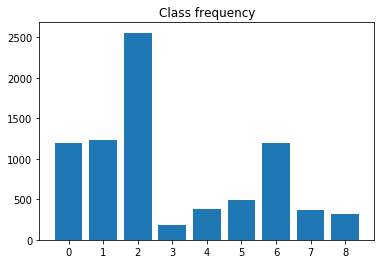

In [8]:
plt.bar(np.arange(0,9), [target_0,target_1,target_2,target_3,target_4,target_5,target_6,target_7,target_8])
plt.xticks(np.arange(0,9))
plt.title("Class frequency")

Text(0.5, 1.0, 'Class weights')

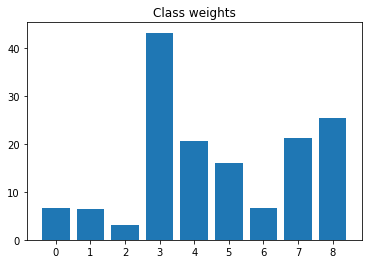

In [9]:
plt.bar(np.arange(0,9), weights)
plt.xticks(np.arange(0,9))
plt.title("Class weights")

In [10]:
class_weights = torch.FloatTensor(weights).cuda()
criterion = nn.CrossEntropyLoss(weight=class_weights)

In [11]:
with open("class_weights_divide.pkl", "wb") as fp:   #Pickling
    pickle.dump(weights, fp)